# Superstore Sales Dataset
#### Predict Sales using Time Series

### Context
Retail dataset of a global superstore for 4 years.
Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset!

### Content
Time series analysis deals with time series based data to extract patterns for predictions and other characteristics of the data. It uses a model for forecasting future values in a small time frame based on previous observations. It is widely used for non-stationary data, such as economic data, weather data, stock prices, and retail sales forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Reading CSV file
df = pd.read_csv('train.csv')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
# Handling the missing values
df["Postal Code"] = df["Postal Code"].fillna("5401")

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.query("State == 'Vermont'").head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5401,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20


In [8]:
# Dropping the Row ID column
df.drop('Row ID',axis = 1, inplace = True)

In [9]:
df.describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [10]:
# Find duplicate rows based on 'Order ID', 'Customer ID', 'Product ID', 'Sales'
duplicates = df[df.duplicated(subset=['Order ID', 'Customer ID', 'Product ID', 'Sales'], keep=False)]

# Display the duplicate rows
print(duplicates)

            Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
3405  US-2015-150119  23/04/2015  27/04/2015  Standard Class    LB-16795   
3406  US-2015-150119  23/04/2015  27/04/2015  Standard Class    LB-16795   

       Customer Name      Segment        Country      City State Postal Code  \
3405  Laurel Beltran  Home Office  United States  Columbus  Ohio     43229.0   
3406  Laurel Beltran  Home Office  United States  Columbus  Ohio     43229.0   

     Region       Product ID   Category Sub-Category  \
3405   East  FUR-CH-10002965  Furniture       Chairs   
3406   East  FUR-CH-10002965  Furniture       Chairs   

                                           Product Name    Sales  
3405  Global Leather Highback Executive Chair with P...  281.372  
3406  Global Leather Highback Executive Chair with P...  281.372  


#### Observation

Rows 3405 and 3406 have identical values for Order ID, Customer ID, Product ID, and Sales, indicating a potential human error (duplicate entry) or a scenario where the same customer ordered the same product on the same day. However, due to the absence of a unique identifier to confirm whether this is a true duplicate, the data will be retained as is.

In [11]:
# Convert Order dates to pandas datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Convert shipping dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [12]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540


## Analyzing Some Features

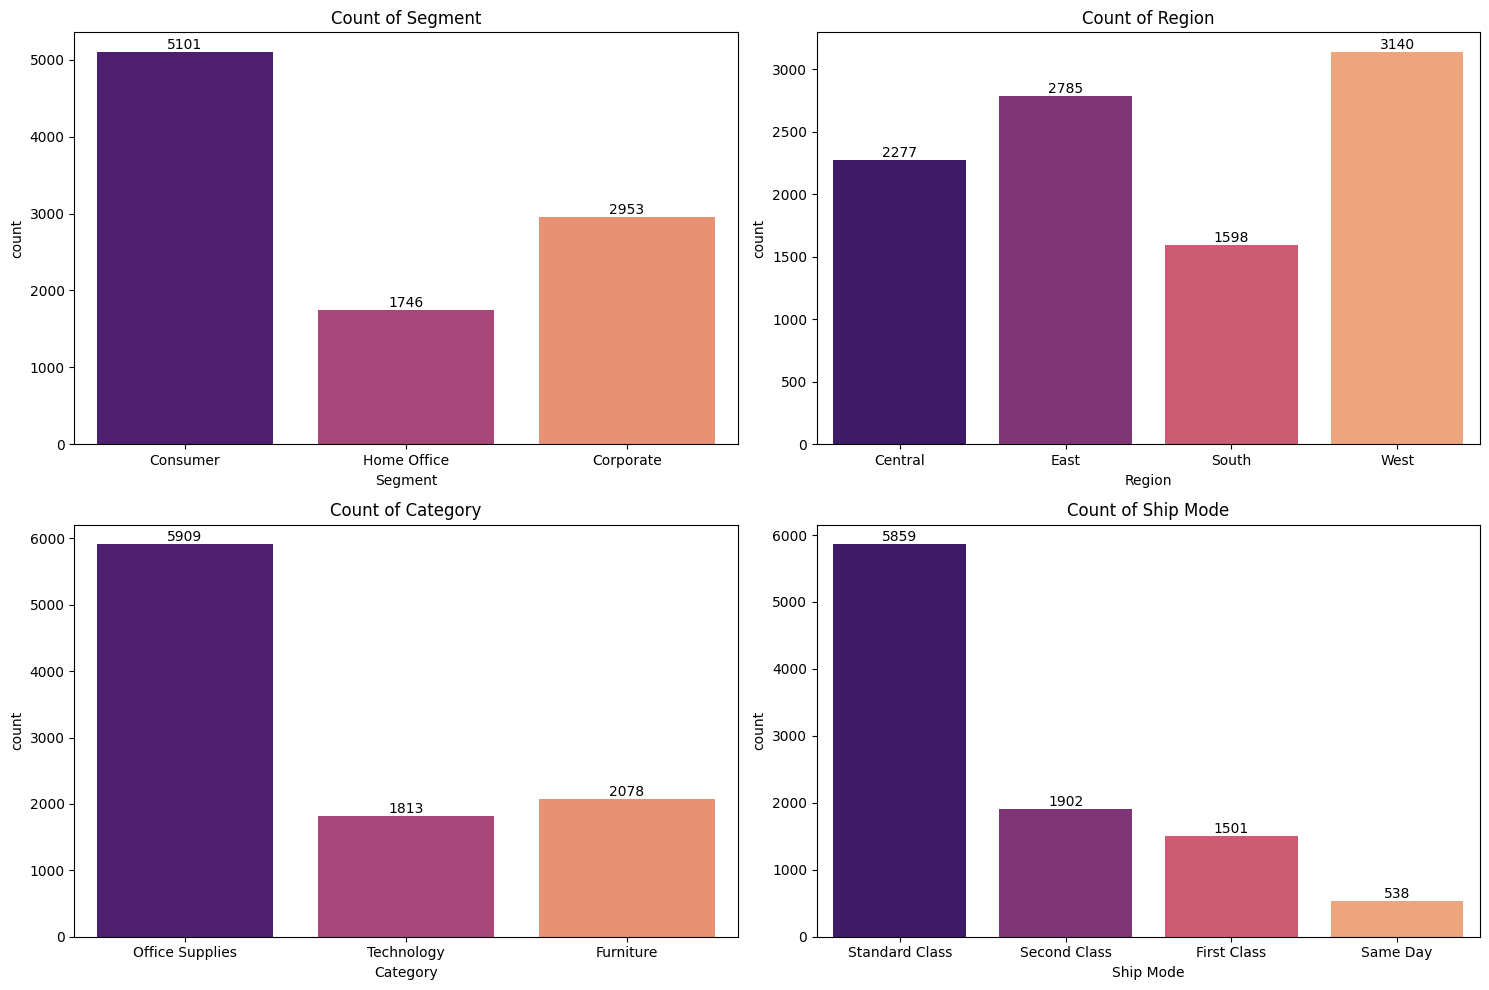

In [13]:
# List of column names to create count plots for
columns = ['Segment', 'Region', 'Category', 'Ship Mode']

# Set up the subplot grid (2 rows and 2 columns for 4 plots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten axes array to iterate over easily
axes = axes.flatten()

# Generate the count plots for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette = "magma")
    axes[i].set_title(f'Count of {col}')
    axes[i].bar_label(axes[i].containers[0])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<b>Observation</b> - The Consumer Segment, West Region, Office Supplies Category, and Standard Class Shipping Mode have the highest counts based on the four plots.

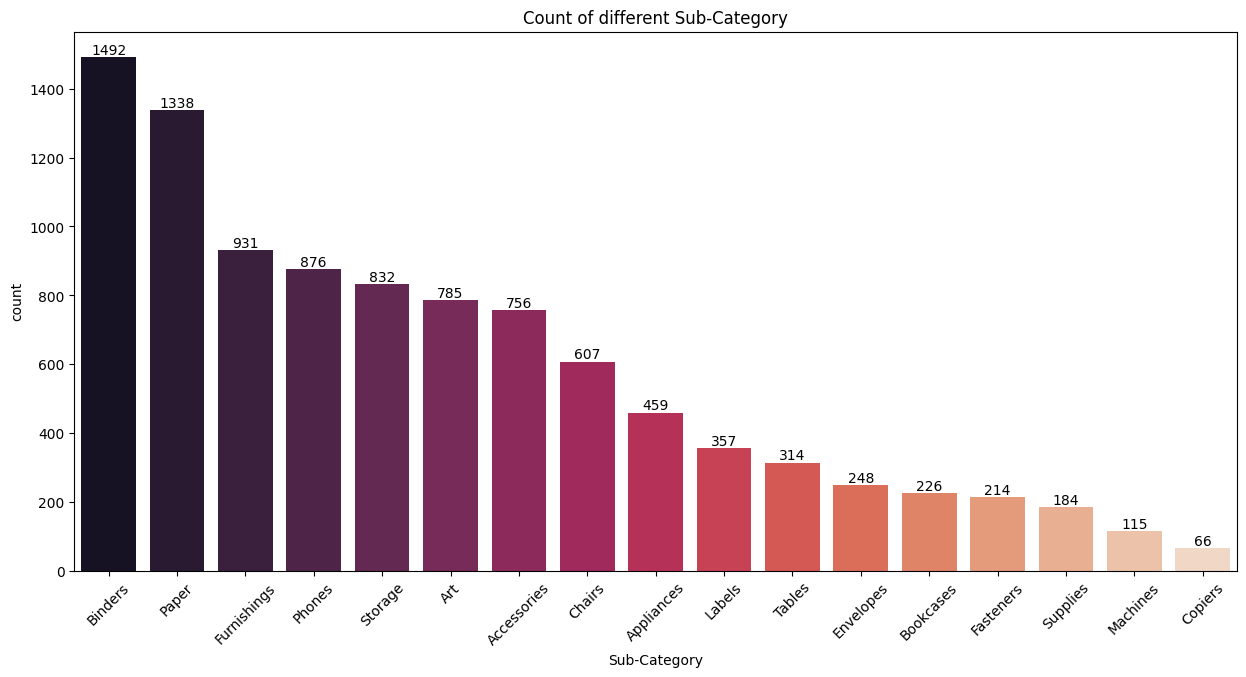

In [14]:
plt.figure(figsize=(15,7))

# Calculate the order of sub-category by count in descending order
order = df['Sub-Category'].value_counts().index

subcat = sns.countplot(x = 'Sub-Category', data = df, palette = "rocket", order=order)
subcat.bar_label(subcat.containers[0])
subcat.set_xticklabels(subcat.get_xticklabels(), rotation=45)
plt.title("Count of different Sub-Category")
plt.show()

<b>Observation</b> - Binders have the highest count as Sub-Category.

## Total Sales by Category, Sub-Category, Region, & Segment

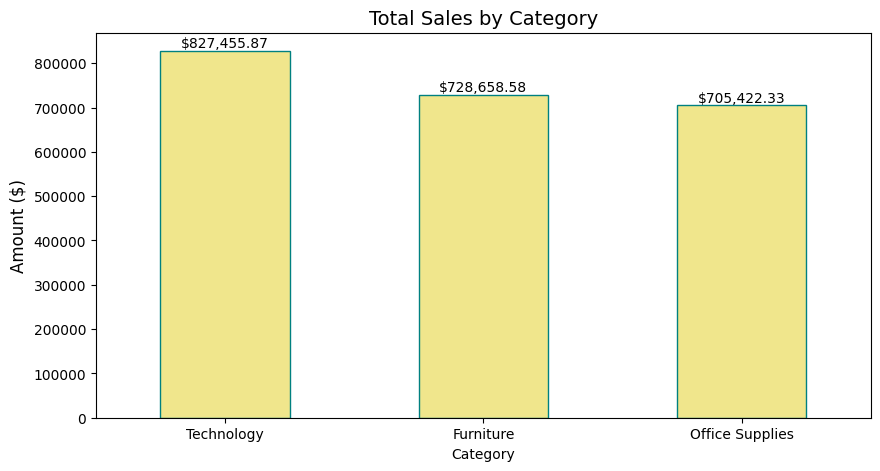

In [15]:
# Group data by category and sum sales
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
cat_bars = category_sales.plot(kind="bar", color='khaki', edgecolor='teal')

# Add exact values on top of bars
for bar in cat_bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2,  # X position
             bar.get_height() + 500,  # Y position (slightly above the bar)
             f"${bar.get_height():,.2f}",  # Format as currency
             ha='center', va='bottom', fontsize=10, color="black")

# Titles and Labels
plt.title("Total Sales by Category", fontsize=14)
plt.ylabel("Amount ($)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

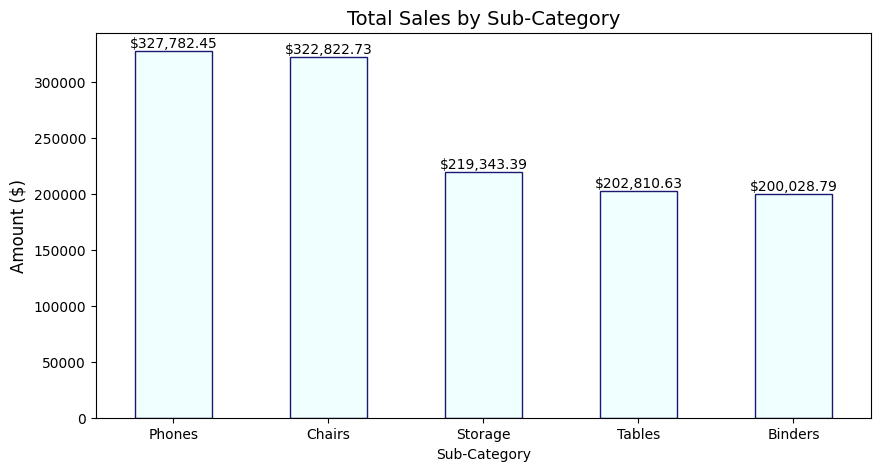

In [16]:
# Group data by sub-category and sum sales
sub_category_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head()

# Plot
plt.figure(figsize=(10,5))
subcat_bars = sub_category_sales.plot(kind="bar", color='azure', edgecolor='midnightblue')

# Add exact values on top of bars
for bar in subcat_bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2,  # X position
             bar.get_height() + 500,  # Y position (slightly above the bar)
             f"${bar.get_height():,.2f}",  # Format as currency
             ha='center', va='bottom', fontsize=10, color="black")

# Titles and Labels
plt.title("Total Sales by Sub-Category", fontsize=14)
plt.ylabel("Amount ($)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

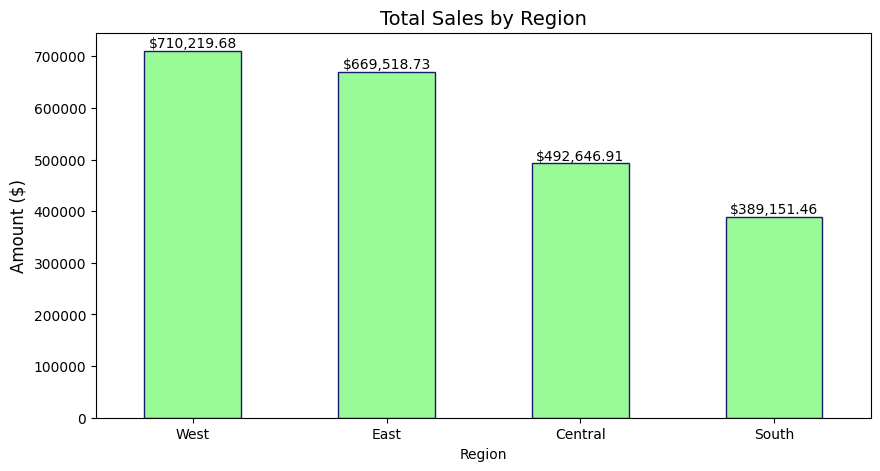

In [17]:
# Group data by category and sum sales
regional_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
reg_bars = regional_sales.plot(kind="bar", color='palegreen', edgecolor='midnightblue')

# Add exact values on top of bars
for bar in reg_bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2,  # X position
             bar.get_height() + 500,  # Y position (slightly above the bar)
             f"${bar.get_height():,.2f}",  # Format as currency
             ha='center', va='bottom', fontsize=10, color="black")

# Titles and Labels
plt.title("Total Sales by Region", fontsize=14)
plt.ylabel("Amount ($)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

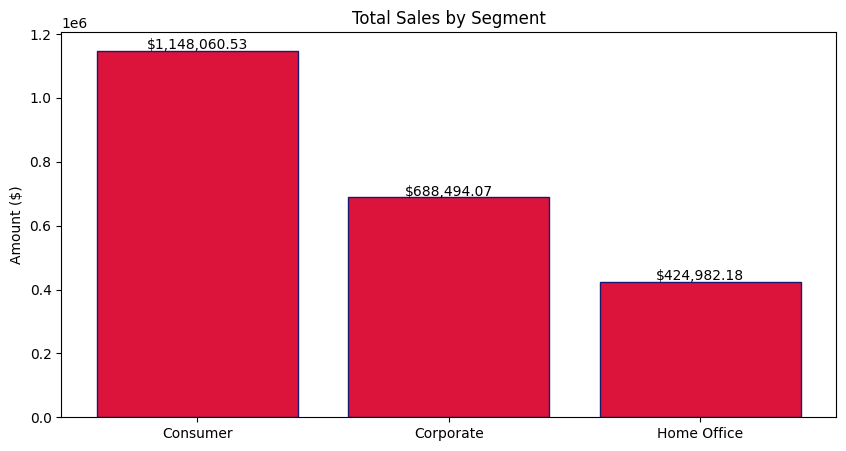

In [18]:
# Group by Segment and sum Sales
segment_sales = df.groupby("Segment")[["Sales"]].sum().sort_values("Sales", ascending=False)

# Plot using Matplotlib for better control
plt.figure(figsize=(10,5))
plt.bar(segment_sales.index, segment_sales["Sales"], color='crimson', edgecolor='midnightblue')
plt.title("Total Sales by Segment")
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)

# Show exact values on bars
for i, v in enumerate(segment_sales["Sales"]):
    plt.text(i, v + 5000, f"${v:,.2f}", fontsize=10, ha="center", color="black")  

plt.show()

<b>Observation</b> - The <b>Technology</b> Category, <b>Phone</b> Sub-Category, <b>West</b> Region, and <b>Consumer</b> Segment have the highest sales based on the above 4 plots.

## Distribution of Customer Segment

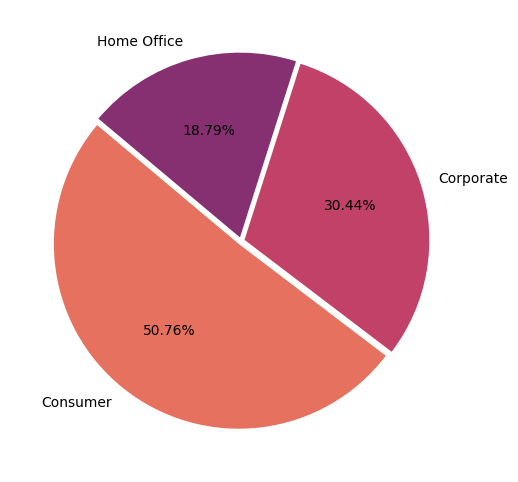

In [19]:
# Aggregate sales by segment
sales_by_segment = df.groupby("Segment")["Sales"].sum()

# Ensure explode list matches the number of segments
explode = [0.02] * len(sales_by_segment)  

# Define color palette
palette = sns.color_palette('flare', len(sales_by_segment))

plt.figure(figsize=(8, 6))
plt.pie(sales_by_segment, labels=sales_by_segment.index, colors=palette, explode=explode, autopct='%1.2f%%', startangle=140)
plt.show()

## Total Sales by Ship Mode

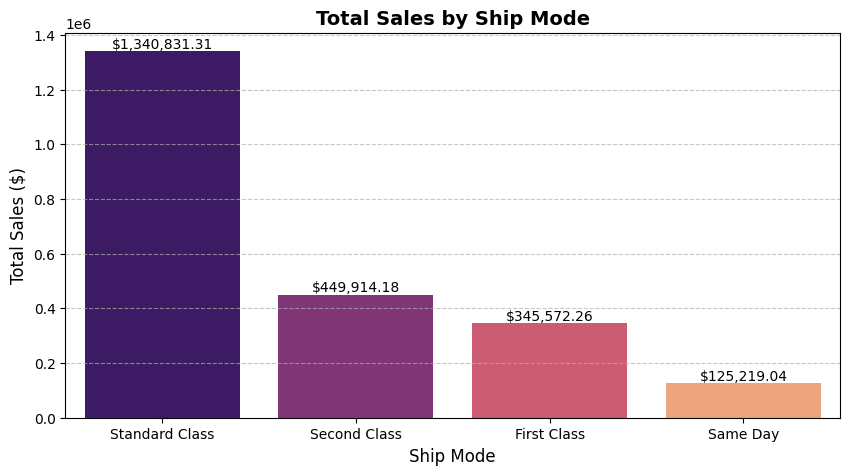

In [20]:
# Group by Ship Mode and sum Sales
ship_mode_sales = df.groupby("Ship Mode")["Sales"].sum().reset_index()

# Sort values in descending order
ship_mode_sales = ship_mode_sales.sort_values(by="Sales", ascending=False)

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
ax = sns.barplot(x="Ship Mode", y="Sales", data=ship_mode_sales, palette="magma")

# Add dollar sign labels on bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.2f}",  # Format as $12,345.67
                (p.get_x() + p.get_width()/2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black')

# Set title and labels
plt.title("Total Sales by Ship Mode", fontsize=14, fontweight="bold")
plt.xlabel("Ship Mode", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

<b>Observation</b> - The <b>Standard Class</b> Shipping Mode has the highest sales.

## Customer Order Frequency

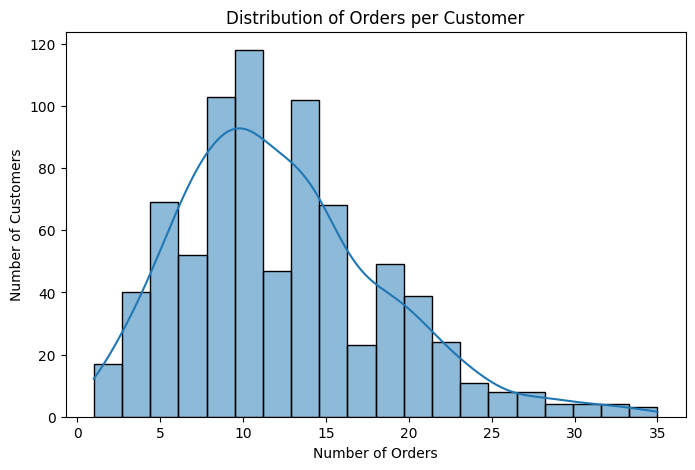

In [21]:
customer_orders = df["Customer ID"].value_counts()

plt.figure(figsize=(8,5))
sns.histplot(customer_orders, bins=20, kde=True)
plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

<b>Observation</b> - 
- The histogram likely shows a right-skewed distribution, meaning a majority of customers place only a few orders, while a small group of customers place many.
- The presence of a tail in the histogram suggests that some loyal customers make frequent purchases, contributing significantly to total sales.
- <b>Retention Strategy Opportunity</b> – Since most customers place fewer orders, a customer loyalty program or discounts for repeat purchases could help increase order frequency.

## Sales by Best & Least Products

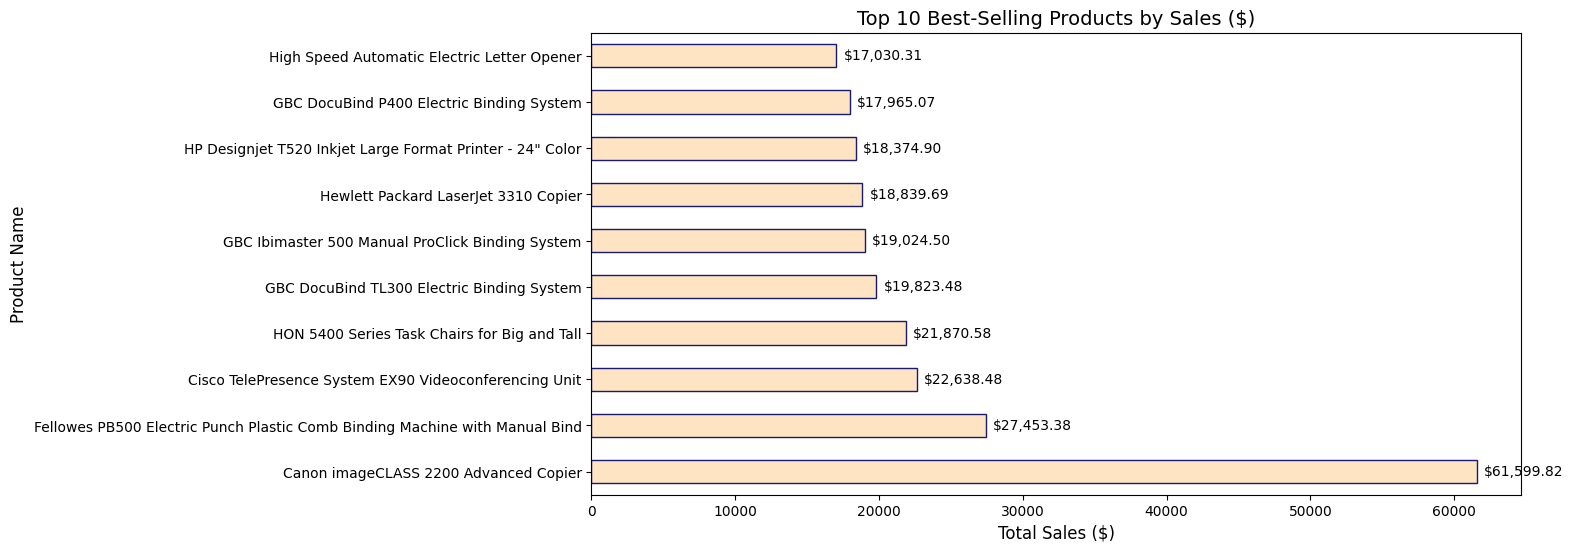

In [22]:
# Group by Product Name, sum Sales, and get the top 10 highest-selling products
best_products = df.groupby("Product Name")["Sales"].sum().nlargest(10)

# Create the plot
plt.figure(figsize=(12,6))
bars = best_products.plot(kind="barh", color="bisque", edgecolor='midnightblue')

# Adding value labels to bars
for bar in bars.patches:
    plt.text(bar.get_width() + 500,  # Position slightly to the right of the bar
             bar.get_y() + bar.get_height()/2, 
             f"${bar.get_width():,.2f}",  # Format as currency
             va="center", fontsize=10)

# Titles and Labels
plt.title("Top 10 Best-Selling Products by Sales ($)", fontsize=14)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

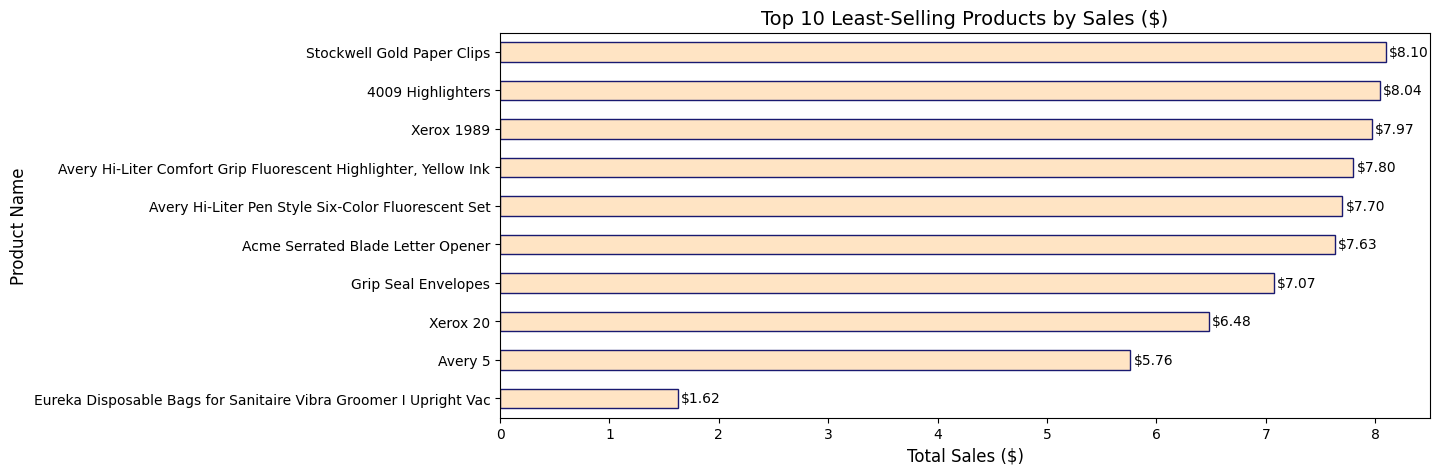

In [23]:
# Group by Product Name, sum Sales, and get the top 10 highest-selling products
worst_products = df.groupby("Product Name")["Sales"].sum().nsmallest(10)

# Create the plot
plt.figure(figsize=(12,5))
bars = worst_products.plot(kind="barh", color="bisque", edgecolor='midnightblue')

# Adding value labels to bars
for bar in bars.patches:
    plt.text(bar.get_width() + 0.03,  # Position slightly to the right of the bar
             bar.get_y() + bar.get_height()/2, 
             f"${bar.get_width():,.2f}",  # Format as currency
             va="center", fontsize=10)

# Titles and Labels
plt.title("Top 10 Least-Selling Products by Sales ($)", fontsize=14)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Top 10 States with High Sales

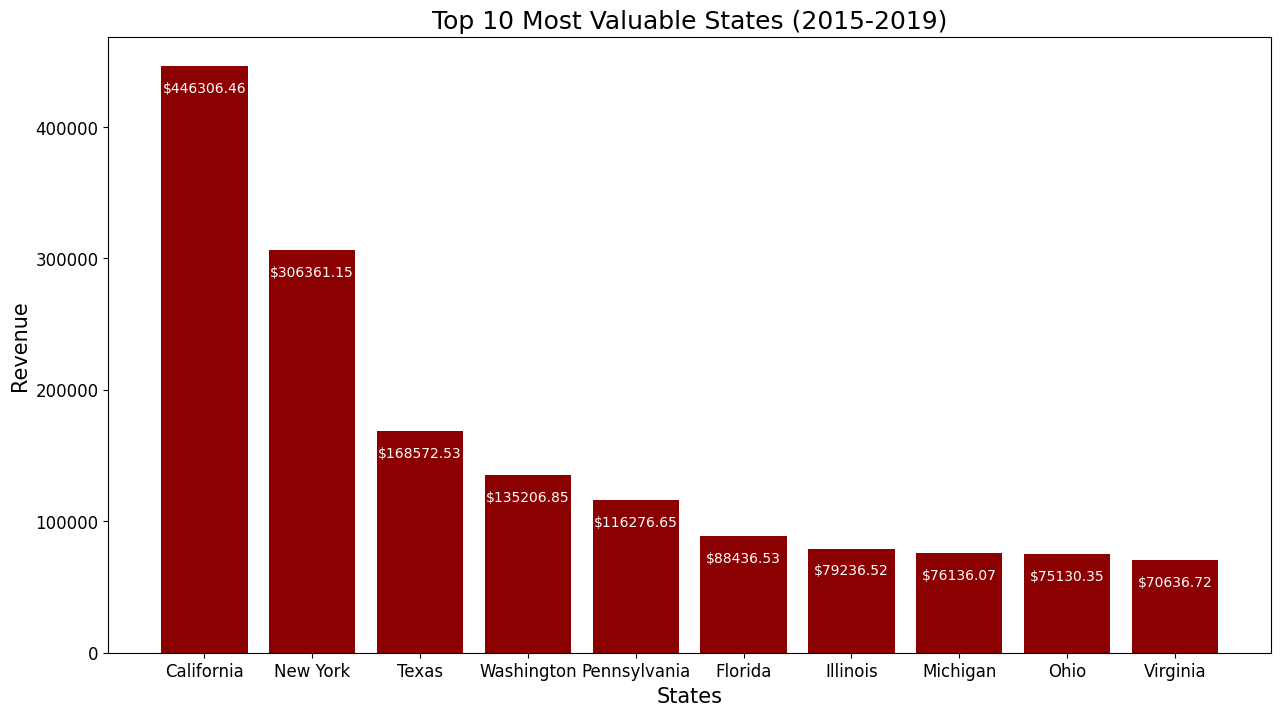

In [24]:
# Sort the Customers as per the sales
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(10)

# Round off the Sales Value up to 2 decimal places
Top_states = Top_states[["Sales"]].round(2)
                
# Since we have used groupby, we will have to reset the index to add the customer name into dataframe
Top_states.reset_index(inplace=True)

# width and height of figure is defined in inches
plt.figure(figsize = (15,8)) 
plt.title("Top 10 Most Valuable States (2015-2019)", fontsize=18) 
plt.bar(Top_states["State"], Top_states["Sales"],color= 'darkred', linewidth = 1)
plt.xlabel("States",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

#To show the exact revenue generated on the figure
for k,v in Top_states["Sales"].items():
    plt.text(k,v-20000,'$'+ str(v), fontsize=10,rotation=0,color='w', horizontalalignment='center');

<b>Obseration</b> - The States <b>California</b> and <b>North Dakota</b> has the highest and the lowest sales respectively.

## Top 10 Customers with High Sales

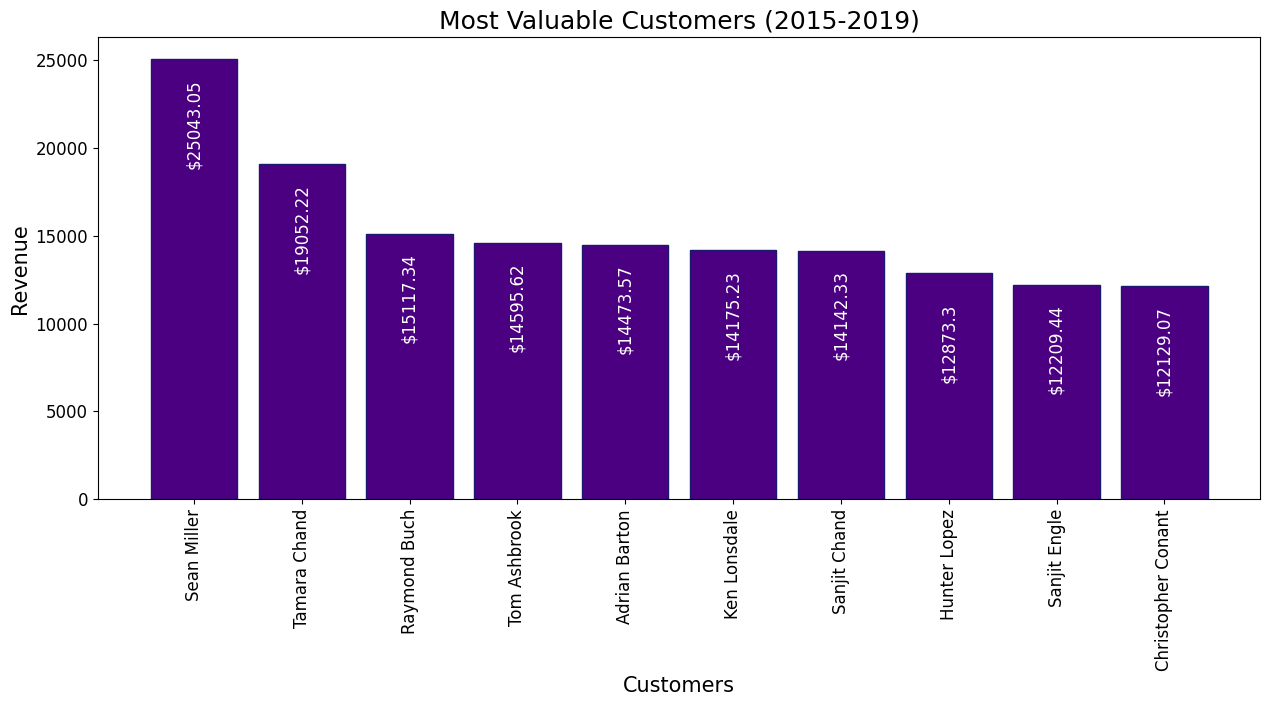

In [25]:
 # Sort the Customers as per the sales
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(10)

# Round off the Sales Value up to 2 decimal places
Top_customers = Top_customers[["Sales"]].round(2)

# Since we have used groupby, we will have to reset the index to add the customer name into dataframe
Top_customers.reset_index(inplace=True)

# width and height of figure is defined in inches
plt.figure(figsize = (15,6)) 
plt.title("Most Valuable Customers (2015-2019)", fontsize=18) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= 'indigo',edgecolor='midnightblue', linewidth = 1)
plt.xlabel("Customers",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

#To show the exact revenue generated on the figure
for k,v in Top_customers["Sales"].items(): 
    plt.text(k,v-6000,'$'+ str(v), fontsize=12,rotation=90,color='w', horizontalalignment='center');

<b>Obseration</b> - The Customers <b>Sean Miller</b> and <b>Thais Sissman</b> has the highest and the lowest sales respectively.

## Time Series Analysis (Sales Over Time)

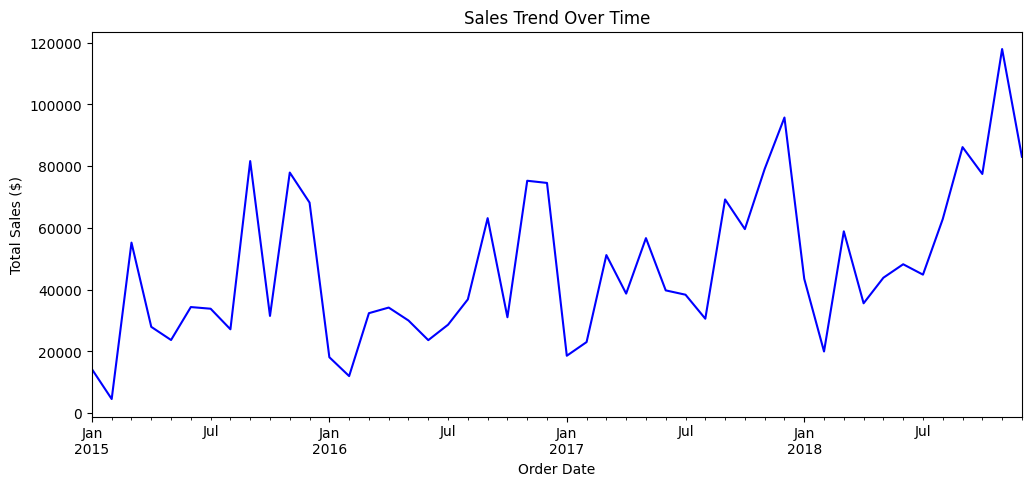

In [26]:
# yyyy-mm-dd
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Setting index to the Order Dates and resampling sum of sales in each month.
df.set_index("Order Date")["Sales"].resample("M").sum().plot(figsize=(12,5), color="blue")
plt.title("Sales Trend Over Time")
plt.ylabel("Total Sales ($)")
plt.show()

<b>Observation</b> - As per the above line chart we can see that throughout the years from 2015 to 2019 there has been an increase in Sales in the Months of September, November and December (Holiday Season in the USA).

### Summary: Key Business Insights

#### From these visualizations, we can derive:

- Top-performing sections in Sales - 
    - The <b>Canon imageCLASS 2200 Advanced Copier</b> Product 
    - <b>Technology</b> Category
    - <b>Phone</b> Sub-Category
    - <b>West</b> Region
    - <b>Consumer</b> Segment.
- Customers Order Distribution - Since most customers place fewer orders, a customer loyalty program or discounts for repeat purchases could help increase order frequency.
- Seasonal trends affecting sales - Increased Sales in the Month of September, November and December (Holiday Season in the USA).
- Most Valuable Customer - <b>Sean Miller</b> with Sales of over <b>$25K</b>.

- Most Valuable State - <b>California</b> with a whooping <b>$450K</b> Sales from 2015 - 2019.
- Shipping modes - 
    - Businesses can focus on optimizing <b>Standard Class</b> shipping mode to improve efficiency. 
    - If one mode is significantly underperforming, it might require promotion or discounts to attract more customers.
- Geographic insights for regional sales strategy - 
    - A noticeable gap exists between the top 2-3 states and the rest, suggesting potential market dominance by a few states.
    - Companies can focus on expanding in high-revenue states or improving sales in underperforming ones to optimize business strategy.